In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/cleaned_reviews.tsv", sep="\t")
df

,rating,vote,verified,reviewTime,reviewerName,reviewText,summary,quaterDiff,voteSuccess
0,4,2,True,2017-04-06,Amazon Customer,helpful,Four Stars,4,0.333333
1,5,0,True,2017-03-14,Amazon Customer,easy understand prompt service,Five Stars,4,0.000000
2,4,0,True,2017-02-14,Christopher Burnett,girlfriend use quite often,Four Stars,4,0.000000
3,5,0,True,2017-01-29,Amazon Customer,arrive described happy,Very happy.,4,0.000000
4,5,0,True,2017-01-04,Iheartmanatees,love dummy series never fails,Love the Dummies Series,5,0.000000
...,...,...,...,...,...,...,...,...,...
25604,5,0,True,2014-02-24,Nadia,like marie claire much anymore content nice ha...,Marie Claire,16,0.000000
25605,5,0,True,2014-02-13,Deborah N.,ive reading mc several year ereader ive age ey...,LOVE THIS MAGAZINE!,16,0.000000
25606,1,2,True,2014-02-12,Coco,cancel subscription diversity cover girl color...,Diversity??,16,0.111111
25607,3,2,True,2014-02-04,Doris M. Goodhues,nothing ad go magazine 5 minute sad guess that...,Too many ads,16,0.111111


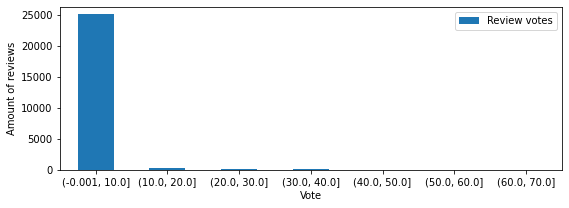

In [3]:
bins = list(range(0, 75, 10))
df["vote"].value_counts(bins=bins).plot(figsize=(9, 3), kind="bar", rot=0)
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")
plt.legend(["Review votes"])

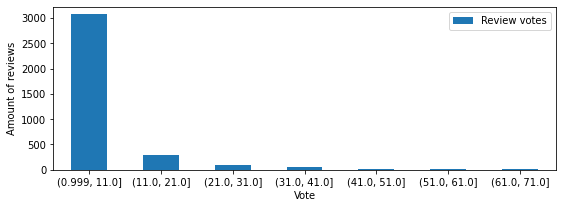

In [4]:
bins = list(range(1, 75, 10))
df["vote"].value_counts(bins=bins).plot(figsize=(9, 3), kind="bar", rot=0)
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")
plt.legend(["Review votes"])

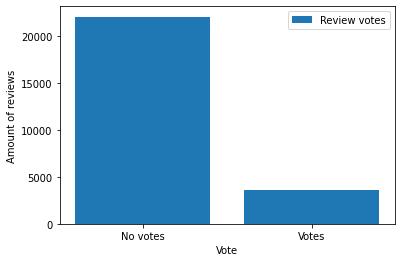

In [5]:
votes = df["vote"].value_counts()
no_votes = votes[0].sum()
has_votes = votes[1:].sum()
plt.bar(["No votes", "Votes"], [no_votes, has_votes])
plt.ylabel("Amount of reviews")
plt.xlabel("Vote")
plt.legend(["Review votes"])

In [6]:
bins = list(range(1, 75, 10))  # [1, 11, 21, 31, 41, 51, 61, 71]


def split_by_ratings(data: pd.DataFrame) -> list[list]:
    split_data = []
    for rating in range(5, 0, -1):
        single_rating_votes = df.loc[df.rating == rating]["vote"]
        binned = single_rating_votes.value_counts(bins=bins)
        split_data.append(binned.to_list())
    return split_data


split_by_ratings(df)

[[1389, 99, 30, 13, 7, 7, 4],
 [428, 44, 22, 13, 4, 4, 1],
 [301, 26, 7, 5, 2, 2, 1],
 [243, 27, 5, 4, 3, 1, 0],
 [708, 87, 32, 10, 7, 6, 2]]

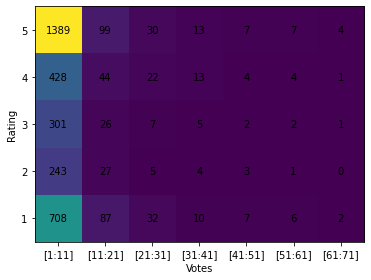

In [7]:
heatmap = np.array(split_by_ratings(df))

bin_labels = [
    "[1:11]",
    "[11:21]",
    "[21:31]",
    "[31:41]",
    "[41:51]",
    "[51:61]",
    "[61:71]",
]
rating_labels = range(5, 0, -1)

fig, ax = plt.subplots()
im = ax.imshow(heatmap)
ax.set_yticks(range(len(rating_labels)), lables="rating")
ax.set_xticks(range(len(bin_labels)), lables="bins")
ax.set_ylabel("Rating")
ax.set_xlabel("Votes")
ax.set_xticklabels(bin_labels)
ax.set_yticklabels(rating_labels)

for i in range(5):
    for j in range(len(bins) - 1):
        text = ax.text(j, i, heatmap[i, j], ha="center", va="center")

fig.tight_layout()
plt.show()